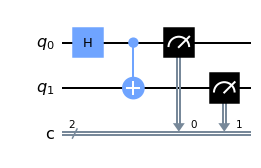

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

circ_bell = QuantumCircuit(2,2)        # 2 qubits and 2 classical channel

circ_bell.h(0)                         # apply the hadamard gate on the first qubit
circ_bell.cx(0,1)                      # apply a CNOT gate with control on first qubit and aim on second
circ_bell.measure(range(2),range(2))   # do the measurement

circ_bell.draw(output='mpl')

In [2]:
# executing the circuit a 1000 times

backend = Aer.get_backend('qasm_simulator')
job = execute(circ_bell, backend, shots = 1000)

counts = job.result().get_counts()


print(counts)

{'11': 496, '00': 504}


In [5]:
circ_bell2 = QuantumCircuit(2)
circ_bell2.h(0)
circ_bell2.cx(0,1)


backend = Aer.get_backend('statevector_simulator')
job = execute(circ_bell2, backend)


state = job.result().get_statevector()

for i in range(4):
    s = format(i,"b")    # convert to binary
    s = (2 - len(s))*"0"+s  # prepend 0s
    print("Amplitude of",s,"=", state[i])

print()

for i in range(4):
    s = format(i,"b")    # convert to binary
    s = (2 - len(s))*"0"+s  # prepend 0s
    print("Probability of",s,"=", state[i]**2)



Amplitude of 00 = (0.7071067811865476+0j)
Amplitude of 01 = 0j
Amplitude of 10 = 0j
Amplitude of 11 = (0.7071067811865476+0j)

Probability of 00 = (0.5000000000000001+0j)
Probability of 01 = 0j
Probability of 10 = 0j
Probability of 11 = (0.5000000000000001+0j)


In [6]:
provider = IBMQ.load_account()
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 4              Pending Jobs: 9              Pending Jobs: 25
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      173.7          Avg. T1:      83.1           Avg. T1:      90.9
Avg. T2:      62.7           Avg. T2:      88.6           Avg. T2:      107.9



ibmq_lima                   ibmq_santiago                ibmq_athens
---------                   -------------                -----------
Num. Qubits:  5             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 2             Pending Jobs: 15             Pending Jobs: 12
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operationa

In [15]:
#backend_monitor(provider.get_backend("ibmq_manila"))

In [10]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(operational = True, simulator = False, status_msg= 'active',filters=lambda x: x.configuration().n_qubits>1))
print("we are executing on....", backend)
print("It has", backend.status().pending_jobs,"pending jobs")
job_exp = execute(circ_bell, backend=backend)
job_monitor(job_exp)

we are executing on.... ibmq_lima
It has 2 pending jobs
Job Status: job has successfully run


In [13]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ_bell)

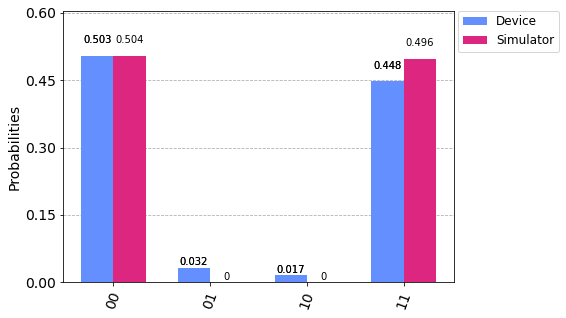

In [14]:
plot_histogram([counts_exp,counts], legend=["Device","Simulator"])